In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
city = pd.read_excel("./city.xlsx")
test = pd.read_excel("./test.xlsx")

## 数据概览

In [3]:
test.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests
0,2019-01-01,control,30,7486.620,1.069746,24,1
1,2019-01-02,control,152,38301.575,1.044199,121,8
2,2019-01-03,control,267,67768.425,1.032276,215,14
3,2019-01-04,control,369,94992.900,1.028196,298,19
4,2019-01-05,control,478,123236.875,1.011807,390,24


In [4]:
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814


In [5]:
test.describe()

,requests,gmv,coupon per trip,trips,canceled requests
count,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,2046.224138,4.820680e+05,0.848199,1633.551724,146.431034
std,1287.778191,2.984599e+05,0.111335,1019.612227,104.260321
min,30.000000,7.382210e+03,0.723737,24.000000,1.000000
25%,968.750000,2.336387e+05,0.756524,799.250000,45.500000
50%,2203.500000,5.092359e+05,0.790527,1745.000000,168.000000
75%,3210.750000,7.495051e+05,0.934330,2553.500000,244.000000
max,4303.000000,1.005137e+06,1.069746,3426.000000,330.000000


In [6]:
city.describe()

,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000
mean,12.000000,234.411111,149.833333,52.807111,29.051333,5.758556,7.19900,0.558130
std,0.821071,143.187933,105.484889,22.480067,14.343199,1.079037,1.23975,0.159561
min,11.000000,15.000000,6.000000,11.250000,9.050000,2.430000,4.61000,0.299312
25%,11.000000,91.250000,50.000000,32.417500,16.025000,5.085000,6.38250,0.427019
50%,12.000000,234.500000,138.000000,52.570000,27.495000,5.725000,7.06500,0.534818
75%,13.000000,327.750000,238.000000,67.135000,39.055000,6.475000,8.04750,0.669226
max,13.000000,558.000000,420.000000,118.930000,73.620000,8.050000,12.06000,0.970345


## 数据清洗
数据量虽少，但好在没有缺失值。先将数据拆分为参照组和实验组，这边我用group_A代替参照组，group_B代替实验组。


In [32]:
#使用query函数选出对照组设为A,实验组设为B
group_A = test.query('group == "control"')
group_B = test.query('group == "experiment"')

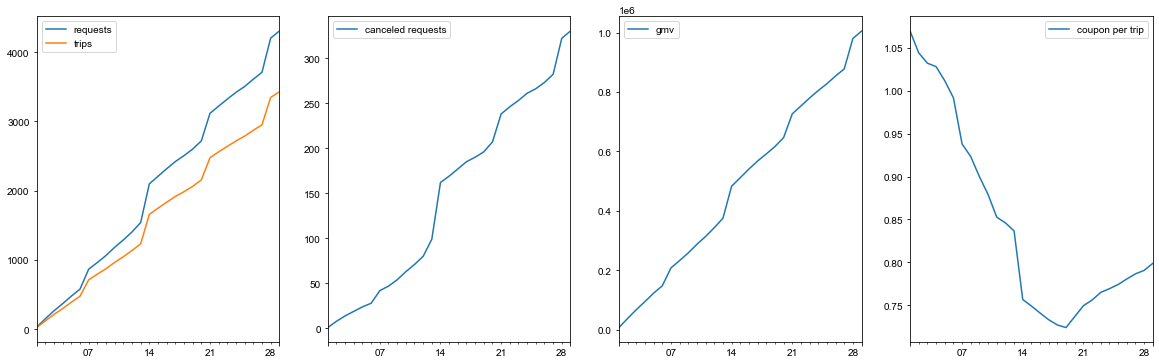

In [39]:
#创建一个figure画簿,axes轴域,1行,4个,共同使用一个x轴,都为0-28
figure,axes = plt.subplots(1,4,figsize=(20,6),sharex = True)
#生成日期和订单请求数,订单数的线形图
group_A.plot.line(x = 'date', y = ['requests','trips'],ax=axes[0])
group_A.plot.line(x= 'date',y =['canceled requests'] ,ax = axes[1])
group_A.plot.line(x = 'date', y = ['gmv'], ax = axes[2])
group_A.plot.line(x = 'date', y = ['coupon per trip'], ax = axes[3])
for ax in axes:
    ax.set_xlabel("")
    ax.set_xticklabels("")
plt.savefig("./滴滴group_A_original.jpg",dpi=200)
plt.show()

In [50]:
for col in ['trips','requests','canceled requests','gmv']:
    group_A[f"c_{col}"]=group_A[col].diff().fillna(group_A[col].min())

具体查看数据发现,数据集里面储存的为累计数据,需要清洗为每日数据进行查看比较

In [52]:
#diff()函数可以计算两行之间的偏差，默认情况下间隔是1行，所以第一行会变为NaN，因此我在后面使用fillna填充第一天的数据
#在订单数,订单请求数,订单取消数,GMV中设置函数
#利用函数,diff()新增几列,diff()函数可以计算两行之间的偏差，默认情况下间隔是1行，所以第一行会变为NaN，因此我在后面使用fillna填充第一天的数据
for col in ['trips','requests','canceled requests','gmv']:
    group_A["c_{col}"]=group_A[col].diff().fillna(group_A[col].min())

In [68]:
group_A.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests,c_trips,c_requests,c_canceled requests,c_gmv,c_{col},coupon_consum,c_coupon,c_coupon per trip,ROI
0,2019-01-01,control,30,7486.620,1.069746,24,1,24.0,30.0,1.0,7486.620,7486.620,25.673904,25.673904,1.069746,291.604269
1,2019-01-02,control,152,38301.575,1.044199,121,8,97.0,122.0,7.0,30814.955,30814.955,126.348139,100.674235,1.044199,306.085811
2,2019-01-03,control,267,67768.425,1.032276,215,14,94.0,115.0,6.0,29466.850,29466.850,221.939286,95.591147,1.032276,308.259196
3,2019-01-04,control,369,94992.900,1.028196,298,19,83.0,102.0,5.0,27224.475,27224.475,306.402259,84.462973,1.028196,322.324376
4,2019-01-05,control,478,123236.875,1.011807,390,24,92.0,109.0,5.0,28243.975,28243.975,394.604730,88.202471,1.011807,320.217503


coupon per trip是每单优惠券金额，我猜测的公式应该是：每单优惠券金额=总优惠金额/使用优惠券的订单数，由于数据集的原因呢，实现这个维度的每日拆解我得饶一绕。

1. 先根据原数据集中的coupon per trip和trips相乘，得到累计的优惠券金额coupon_consum
2. 再使用diff计算出每行coupon_consum的偏差，即每天的优惠券使用金额
3. 将每天的优惠券使用金额除以每天的trips得到每天的每单优惠券金额

In [73]:
group_A['coupon_consum'] = (group_A['coupon per trip']*group_A['trips'])
group_A['c_coupon'] = group_A['coupon_consum'].diff().fillna(group_A['coupon_consum'].min())
group_A['c_coupon per trip'] = group_A['c_coupon'] / group_A['c_trips']

# 新增ROI，由于缺少具体的盈利数据，所以这边就用每日gmv和每日优惠券金额做个简易的ROI指标
group_A['ROI'] = group_A['c_gmv']/group_A['c_coupon']



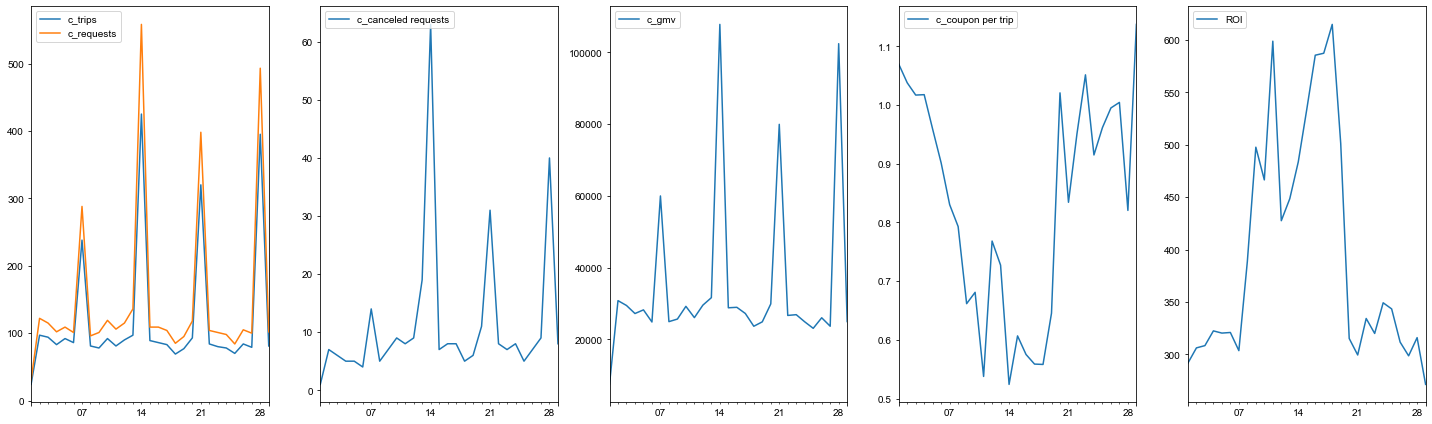

In [74]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharex=True,facecolor='white')
group_A.plot.line(x = 'date',y = ['c_trips','c_requests'],ax=axes[0])
group_A.plot.line(x = 'date',y = ['c_canceled requests'],ax=axes[1])
group_A.plot.line(x = 'date',y = 'c_gmv',ax=axes[2])
group_A.plot.line(x = 'date',y = 'c_coupon per trip',ax=axes[3])
group_A.plot.line(x = 'date',y = 'ROI',ax=axes[4])

for ax in axes:
    ax.set_xlabel("")
    ax.set_xticklabels("")
    ax.legend(loc=2)
plt.tight_layout()

这么看起来好像才像正常的运营数据，那把group_B也一并清洗一下。

In [97]:
group_B.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests,c_{col2},c_trips,c_requests,c_canceled requests,c_gmv,coupon_consum,c_coupon,c_coupon per trip,ROI
29,2019-01-01,experiment,30,7382.210,1.039303,24,1,7382.210,24.0,30.0,1.0,7382.210,24.943266,24.943266,1.039303,295.960040
30,2019-01-02,experiment,152,36580.200,1.042920,123,7,29197.990,99.0,122.0,6.0,29197.990,128.279129,103.335863,1.043797,282.554276
31,2019-01-03,experiment,277,67626.375,1.034808,225,13,31046.175,102.0,125.0,6.0,31046.175,232.831800,104.552671,1.025026,296.942917
32,2019-01-04,experiment,383,94601.700,1.030538,311,18,26975.325,86.0,106.0,5.0,26975.325,320.497396,87.665596,1.019367,307.707086
33,2019-01-05,experiment,497,123388.850,1.025366,406,24,28787.150,95.0,114.0,6.0,28787.150,416.298596,95.801200,1.008434,300.488406


In [83]:
for col2 in ['trips','requests','canceled requests','gmv']:
    group_B[f"c_{col2}"]=group_B[col2].diff().fillna(group_B[col2].min())
# 计算每天的每单优惠券金额
group_B ['coupon_consum'] =( group_B['coupon per trip']*group_B['trips'])
group_B ['c_coupon'] = group_B ['coupon_consum'].diff().fillna(group_B ['coupon_consum'].min() )
group_B ['c_coupon per trip'] = group_B ['c_coupon'] / group_B['c_trips']
# 新增ROI，由于缺少具体的盈利数据，所以这边就用每日gmv和每日优惠券金额做个简易的ROI指标
group_B['ROI']= group_B['c_gmv'] / group_B['c_coupon']


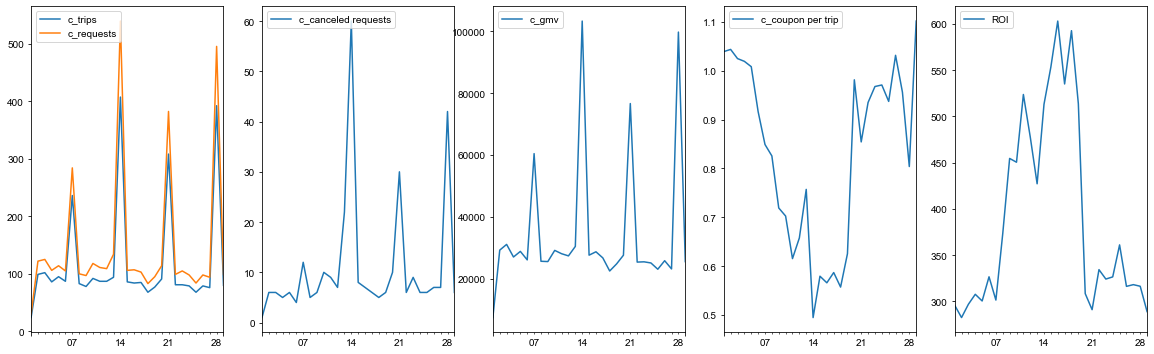

In [100]:
fig,axes = plt.subplots(1,5,figsize= (20,6),sharex = True,facecolor='white')
group_B.plot.line(x = 'date',y = ['c_trips','c_requests'],ax = axes[0])
group_B.plot.line(x = 'date',y = 'c_canceled requests',ax = axes[1])
group_B.plot.line(x = 'date',y = 'c_gmv',ax = axes[2])
group_B.plot.line(x = 'date',y = 'c_coupon per trip',ax = axes[3])
group_B.plot.line(x = 'date',y = 'ROI',ax = axes[4])

for ax2 in axes:
    ax2.set_xlabel("")
    ax2.set_xticklabels("")
    ax2.legend(loc=2)

plt.show()

<AxesSubplot:xlabel='weekday'>

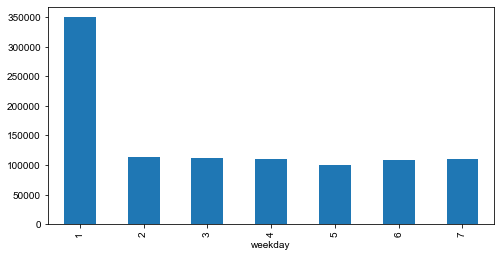

In [101]:
group_A ['weekday'] = group_A.date.dt.weekday+1
plt.figure(figsize = (8,4))
group_A.groupby(by = 'weekday').c_gmv.sum().plot.bar()

In [102]:
for i in [group_A,group_B]:
    i['cancel rate']=i['c_canceled requests']/i['c_requests']
    i['accept rate']=i['c_trips']/(i['c_requests']-i['c_canceled requests'])

由图可见周一个GMV最高的

## AB test效果分析

test总共58条记录，每个组是29条记录，总体标准差未知，使用双样本T检验。\
零假设：AB两组均值相等\
备择假设：AB两组均值不等\
显著性水平：0.05

In [103]:
#导入所需要的包
from scipy import stats
ttest = []
for i in ['c_trips', 'c_requests', 'c_canceled requests', 'c_gmv', 'c_coupon per trip', 'ROI', 'accept rate', 'cancel rate']:
    t, p = stats.ttest_rel(group_B[i], group_A[i])
    ttest.append([i, t, p])
pd.DataFrame(ttest, columns=['col', 't', 'p'])

,col,t,p
0,c_trips,-1.302268,0.203436
1,c_requests,-1.471627,0.152273
2,c_canceled requests,-1.262748,0.217095
3,c_gmv,-2.453795,0.020618
4,c_coupon per trip,-0.142977,0.887332
5,ROI,-1.093332,0.283566
6,accept rate,0.402347,0.690484
7,cancel rate,-0.912108,0.369498


可以看出此次ABtest，每日gmv小于0.05，即本次实验前后每日GMV有显著性差异。\
但每日GMV的T值小于0，即实验组的每日GMV均值小于控制组，由于未知案例中GMV的统计口径，无法对指标拆解，定位背后原因，所以只能笼统地给出方案：“需优化运营策略，再次进行ABtest”。

##  运营情况分析

In [104]:
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814


根据已给定的维度，我们来考虑一下可以从那几个角度来分析呢：

1. 时间角度\
每日、每时段、周内周末指标对比\
周、月同环比
2. 司机角度\
接单率\
平均订单时长\
可服务时长\
在忙率
3. 用户角\
请求数量\
取消率\
等待时长

根据上面几个角度，暂且提出以下问题：

1. 给定数据的运营情况走势如何
2. 乘客用车高峰期是那个时期，运力能否满足乘客需求
3. 顾客预计与等待时间的差异
4. 均单时长分布

In [112]:
title_font={'size':25}
label_font={'size':12}

### 时间角度

日期与请求数量的关系


Text(0.5, 1.0, '日期与请求数量实际完成数量的关系')

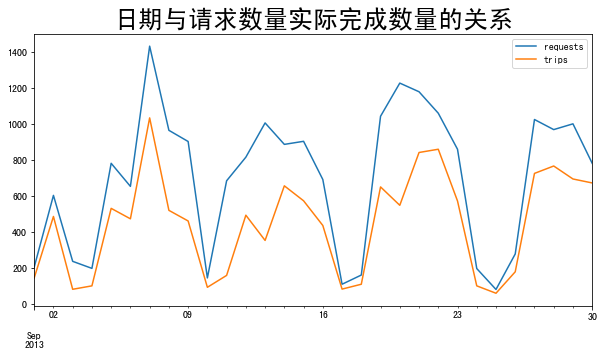

In [125]:
plt.rcParams['font.sans-serif'] = ['SimHei']
city.groupby(by = 'date').agg({
    'requests':'sum',
    'trips':'sum'
}).plot.line(figsize = (10,5))
plt.xlabel(None)
plt.title('日期与请求数量实际完成数量的关系',fontdict=title_font)

由图看出,周末请求数量明显多于工作日,节假日带来更多的出行需求

### 司机角度
接单率

In [118]:
accept = city.groupby(by = 'hour') ['requests','trips'].mean()
accept['rate'] = accept['trips']/accept['requests']*100
accept

,requests,trips,rate
hour,,,
11,200.266667,151.666667,75.732357
12,284.333333,195.000000,68.581477
13,218.633333,102.833333,47.034609


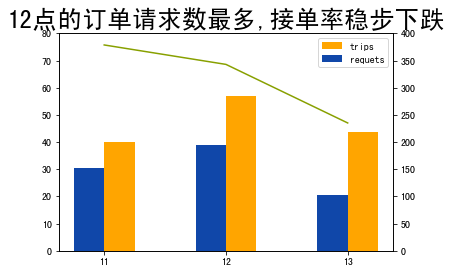

In [131]:
fig,ax1 = plt.subplots()
ax1.plot(accept.index, accept.rate, color='#88a000', label='rate')
ax1.set_ylim(bottom = 0,top = 80)
#产生一个ax1的镜面坐标
ax2 = ax1.twinx()
ax2.bar(accept.index+0.125, accept.requests,width=0.25,color='#ffa500')
ax2.bar(accept.index-0.125, accept.trips,width=0.25,color='#1047a9')
ax2.set_yticks([i for i in range(0, 450, 50)])

plt.xticks([11, 12, 13])
plt.title("12点的订单请求数最多,接单率稳步下跌", fontdict=title_font)
plt.xticks(rotation=0)
plt.legend(['trips', 'requets', 'rate'])

In [147]:
#查看当前日期为周几
city ['weekday']= city.date.dt.weekday+1
#新增一列是否为周末,使用匿名函数定义
accept2 = city.groupby(by = ['is_weekday','hour'])['trips','requests'].mean().apply(
    lambda x: x.trips/x.requests, axis=1).reset_index().rename({0: "rate"}, axis=1)
accept2

,is_weekday,hour,rate
0,周末,11,0.828417
1,周末,12,0.744774
2,周末,13,0.544531
3,工作日,11,0.709803
4,工作日,12,0.642011
5,工作日,13,0.422856


Text(0.5, 0, '')

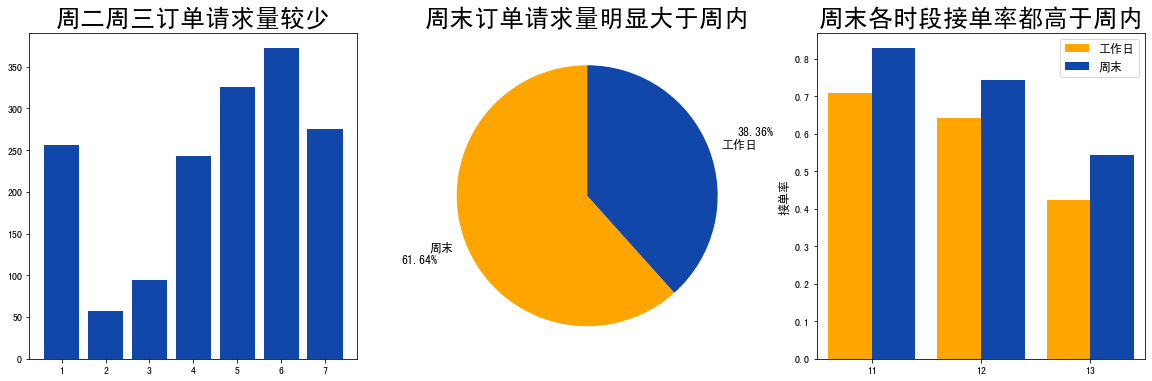

In [171]:
fig,axes = plt.subplots(1,3,figsize = (20,6))
#第一个图
ax1 = axes[0]
ax1.bar(x = [i for i in range(1,8)], height=city.groupby(
    by='weekday').requests.mean(), color='#1047a9', alpha=1)
ax1.set_title("周二周三订单请求量较少", fontdict=title_font)

#第二个图
ax2 = axes[1]
ax2.pie(city.groupby(by = 'is_weekday').requests.mean(), labels=[
        '周末', '工作日'], autopct="%.2f%%", pctdistance=1.38,startangle=90, colors=['#ffa500', '#1047a9'],textprops=label_font)
ax2.set_title("周末订单请求量明显大于周内", fontdict=title_font)

#第三个图
ax3 = axes[2]
sns.barplot(x = 'hour', y = 'rate',hue = 'is_weekday',data = accept2,
            palette=['#ffa500', '#1047a9'], saturation=1,hue_order= ["工作日","周末"])
ax3.set_ylabel("接单率",fontdict=label_font)
ax3.set_title("周末各时段接单率都高于周内",fontdict=title_font)
ax3.legend(title=None,fontsize=12)
ax3.set_xlabel(None)

### 周末请求数远高于周内，周六是用车高峰
1. 周二周三的订单请求量最少，其余各天请求量相差不大，周五周六请求量最多
2. 周末的请求量明显大于周内
3. 周末各时段司机接单率都高于周内

等待时长和日期的关系

In [174]:
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz,weekday,is_weekday
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240,7,周末
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297,7,周末
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503,7,周末
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187,1,工作日
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814,1,工作日


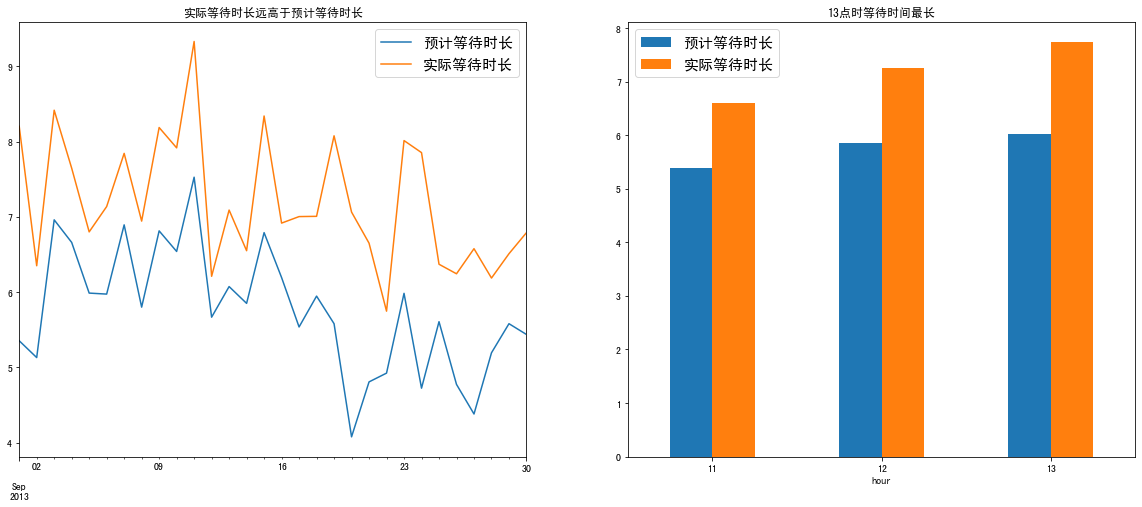

In [187]:
fig,axes = plt.subplots(1,2,figsize= (20,8))
#第一个图
ax1 = axes[0]
city.groupby('date')['pETA','aETA'].mean().plot.line(ax=ax1)
ax1.set_title('实际等待时长远高于预计等待时长')
ax1.set_xlabel(None)
ax1.legend(['预计等待时长', '实际等待时长'],fontsize= 15)

#第二个图
ax2 = axes[1]
city.groupby('hour')['pETA','aETA'].mean().plot.bar(ax=ax2)
ax2.set_title('13点时等待时间最长')
ax2.set_xticklabels([11, 12, 13], rotation=0)
ax2.legend(['预计等待时长','实际等待时长'],fontsize= 15)

### 实际等待时长远高于预计等待时长
1. 统计时段内顾客实际等待时长逐渐减少，可能是配送车辆增加，优化了路线
2. 11-13点这段时间内实际等待时长逐渐增加，13点的实际等待时长最久
3. 预计等待时长与实际等待时长相差过大，仍需要迭代更新时间预估模块，优化派单逻辑
4. 实际等待时间长可能是司机都在忙，运力不足

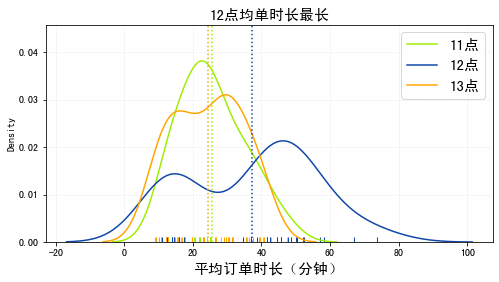

In [219]:
plt.figure(figsize=(8, 4), facecolor='white')
sns.distplot(city[city.hour == 11]['average minutes of trips'], color='#9fee00'
             ,hist=False,kde=True,rug = True,label = '11点')
sns.distplot(city[city.hour == 12]['average minutes of trips'], color='#1047a9'
             ,hist=False,kde=True,rug = True,label = '12点')
sns.distplot(city[city.hour == 13]['average minutes of trips'], color='#ffa500'
             ,hist=False,kde=True,rug = True,label = '13点')

plt.axvline(city[city.hour == 11]['average minutes of trips'].mean()
            ,color='#9fee00', linestyle=":")
plt.axvline(city[city.hour == 12]['average minutes of trips'].mean()
           , color='#1047a9', linestyle=":" )
plt.axvline(city[city.hour == 13]['average minutes of trips'].mean()
            , color='#ffa500',  linestyle=":")
            
plt.grid(linestyle="--", alpha=0.2)
plt.title("12点均单时长最长",fontsize= 15)
plt.xlabel("平均订单时长（分钟）",fontsize= 15)
plt.legend(['11点','12点','13点'],fontsize= 15)

11、13点这两个时段的均单时长较短，12点的均单时长最长

Text(0.5, 1.0, '12、13点司机在忙率较高')

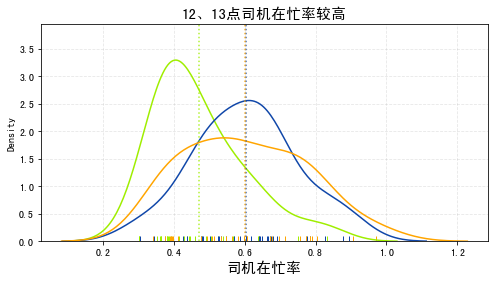

In [228]:
plt.figure(figsize = (8,4))
sns.distplot(city[city.hour == 11]["utiliz"], color='#9fee00'
             ,hist=False,kde=True,rug = True,label = '11点')
sns.distplot (city[city.hour==12]['utiliz'],color='#1047a9'
             ,hist=False,kde=True,rug = True,label = '12点')
sns.distplot(city[city.hour==13]['utiliz'],color='#ffa500'
             ,hist=False,kde=True,rug = True,label = '13点')
#加入平均线
plt.axvline(city[city.hour == 11]['utiliz'].mean()
           , color='#9fee00', linestyle=":", alpha=0.8)
plt.axvline(city[city.hour == 12]['utiliz'].mean()
           , color='#1047a9', linestyle=":", alpha=0.8)
plt.axvline(city[city.hour == 13]['utiliz'].mean()
           , color='#ffa500', linestyle=":", alpha=0.8)
#设置背景为格,透明度0.3
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('司机在忙率',fontsize = 15)
plt.title("12、13点司机在忙率较高",fontsize = 15)

可以认为是12、13点司机在忙率较高，所以导致了12、13点的接单率下降，顾客实际等待时间增加。

### 相关性检测

In [231]:
city['rate']=city.trips/city.requests
city.corr().style.background_gradient
('OrRd')

,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz,weekday,rate
hour,1.000000,0.052659,-0.190054,-0.234614,-0.035950,0.236269,0.371433,0.334071,0.000000,-0.468675
requests,0.052659,1.000000,0.837015,0.654692,0.810837,-0.007639,0.025894,0.413997,0.420478,-0.041166
trips,-0.190054,0.837015,1.000000,0.880738,0.907870,-0.151332,-0.259215,0.198133,0.408854,0.435483
supply hours,-0.234614,0.654692,0.880738,1.000000,0.827092,-0.312910,-0.487399,-0.118937,0.421520,0.535273
average minutes of trips,-0.035950,0.810837,0.907870,0.827092,1.000000,0.021548,-0.058355,0.412460,0.386764,0.287043
pETA,0.236269,-0.007639,-0.151332,-0.312910,0.021548,1.000000,0.634522,0.560360,-0.158184,-0.354286
aETA,0.371433,0.025894,-0.259215,-0.487399,-0.058355,0.634522,1.000000,0.665902,-0.155170,-0.565313
utiliz,0.334071,0.413997,0.198133,-0.118937,0.412460,0.560360,0.665902,1.000000,0.061231,-0.399438
weekday,0.000000,0.420478,0.408854,0.421520,0.386764,-0.158184,-0.155170,0.061231,1.000000,0.105339
rate,-0.468675,-0.041166,0.435483,0.535273,0.287043,-0.354286,-0.565313,-0.399438,0.105339,1.000000


从上图可以看出trips和supply hours有较强的相关性，接单率与supply hours仅有较弱的相关性

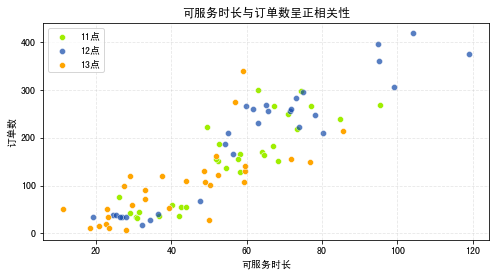

In [233]:
plt.figure(figsize=(8, 4), facecolor='white')

sns.scatterplot(x='supply hours', y='trips',
                data=city[city.hour == 11], label='11点', color='#9fee00',alpha=1)
sns.scatterplot(x='supply hours', y='trips',
                data=city[city.hour == 12], label='12点', color='#1047a9',alpha=0.7)
sns.scatterplot(x='supply hours', y='trips',
                data=city[city.hour == 13], label='13点', color='#ffa500',alpha=1)

plt.grid(linestyle="--", alpha=0.3)
plt.title("可服务时长与订单数呈正相关性")
plt.xlabel("可服务时长")
plt.ylabel("订单数")
plt.show()

# 总结

## 时间维度
1. 统计周期内的运营情况呈现周期性波动，周末的订单请求数较多，周二周三的订单量较少，中午12点的请求量最多
2. 周末各时段接单率都高于周内，但仍随着时间推移接单率下降

## 司机维度
3. 预计等待时长与实际等待时长存在一定差异，实际等待时长随着时间推移而增加，13点的实际等待时长最久
4. 12点均单时长最长，接单率下降幅度较少，11点的均单时长稍长于13点，但接单率远高于13点。
5. 司机在忙率的提高导致接单率下降，顾客等待时长增加。

## 建议

1. 提高运力，增加司机及配车，减少高峰时段的运营压力
2. 优化时间预计算法，提高用户体验，优化订单分配及路线规划算法，提高司机的抢单及接送速度
3. 适当发放限时优惠券，限定在12点之前使用，减少12、13点的接单压力
4. 适当增加12、13点时间段内对于司机的补贴，加快接单速度，提高运营效率